In [187]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["axes.formatter.limits"] = (-5, 12)

In [188]:
#formatted the API calls for the Characteristics of the Business Endpoint and the Technology Endpoint.

response = requests.get('https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,TECHUSE,TECHUSE_LABEL,MOTPRODTECH,MOTPRODTECH_LABEL,MOTUSETECH,MOTUSETECH_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,RCPPDEMP_S,RCPPDEMP_S_F,IMPACTWF_P,IMPACTWF_P_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL&for=us:*&key=941829fad2b1ee1c55761ddb0b6349e5e76ef425')
raw_json = response.json()
response2 = requests.get('https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,YIBSZFI,YIBSZFI_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,EMPSZFI,EMPSZFI_LABEL,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*&QDESC_LABEL=FAMOWN&key=941829fad2b1ee1c55761ddb0b6349e5e76ef425')
raw_json2 = response2.json()

In [189]:
df = pd.DataFrame(raw_json,columns=raw_json.pop(0))
df2 = pd.DataFrame(raw_json2,columns=raw_json2.pop(0))

In [190]:
#cleaned the IMPACTWF_P_LABEL column. It contains redundant categories, hence I combined multiple pairs into one.


df.loc[df.IMPACTWF_P_LABEL == 'Cloud-Based: Increased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Cloud-Based: Increased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Cloud-Based: Decreased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Cloud-Based: Decreased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Cloud-Based: Did not change skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Cloud-Based: Did not change STEM skills of workers employed by this business'

df.loc[df.IMPACTWF_P_LABEL == 'Specialized Software: Increased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Specialized Software: Increased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Specialized Software: Decreased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Specialized Software: Decreased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Specialized Software: Did not change skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Specialized Software: Did not change STEM skills of workers employed by this business'

df.loc[df.IMPACTWF_P_LABEL == 'Robotics: Increased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Robotics: Increased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Robotics: Decreased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Robotics: Decreased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Robotics: Did not change skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Robotics: Did not change STEM skills of workers employed by this business'

df.loc[df.IMPACTWF_P_LABEL == 'Specialized Equipment: Increased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Specialized Equipment: Increased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Specialized Equipment: Decreased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Specialized Equipment: Decreased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Specialized Equipment: Did not change skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Specialized Equipment: Did not change STEM skills of workers employed by this business'

df.loc[df.IMPACTWF_P_LABEL == 'Artificial Intelligence: Increased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Artificial Intelligence: Increased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Artificial Intelligence: Decreased skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Artificial Intelligence: Decreased STEM skills of workers employed by this business'
df.loc[df.IMPACTWF_P_LABEL == 'Artificial Intelligence: Did not change skill level of workers employed by this business', 'IMPACTWF_P_LABEL'] = 'Artificial Intelligence: Did not change STEM skills of workers employed by this business'

#IMPACTWF_U_LABEL and IMPACTWF_P_LABEL are virtually identical, hence i dropped the former within the API call.

#In the TECHUSE_LABEL columns, those rows containing 'Total use' and 'Total Reporting' were most likely supposed to be the same category.
#hence I combined them

df.loc[df.TECHUSE_LABEL == 'Artificial Intelligence: Total use', 'TECHUSE_LABEL'] = 'Artificial Intelligence: Total Reporting'
df.loc[df.TECHUSE_LABEL == 'Robotics: Total use', 'TECHUSE_LABEL'] = 'Robotics: Total Reporting'
df.loc[df.TECHUSE_LABEL == 'Cloud-Based: Total use', 'TECHUSE_LABEL'] = 'Cloud-Based: Total Reporting'
df.loc[df.TECHUSE_LABEL == 'Specialized Equipment: Total use', 'TECHUSE_LABEL'] = 'Specialized Equipment: Total Reporting'
df.loc[df.TECHUSE_LABEL == 'Specialized Software: Total use', 'TECHUSE_LABEL'] = 'Specialized Software: Total Reporting'

#RCCDEMP was a string when it should have been numeric. Hence I have changed it to a float.
df['RCPPDEMP'] = df['RCPPDEMP'].astype(float)

#I did the same thing with FIRMPDEMP
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(float)

#I wanted to investigate total revenue for firms based on their use of Cloud Technologies.

#several of the categories in this dataset contain overall-values and values separated by group.
#In order to investigate Cloud-Technologies without there being overlap, I had to set all other columns to their 'total' values.
#I created a subset of the data where all categories were normalized aside from TECHUSE_LABEL, which measures the levels of use for various technologies within
#the work-foce.

Cloud_use = df[(df['ETH_GROUP_LABEL'] == 'Total') & (df['IMPACTWF_P_LABEL'] == 'All firms') & (df['IMPACTWF_U_LABEL'] == 'All firms') & (df['MOTPRODTECH_LABEL'] == 'All firms') & (df['MOTUSETECH_LABEL'] == 'All firms') & (df['NAICS2017_LABEL'] == 'Total for all sectors') & (df['NSFSZFI_LABEL'] == 'All firms') & (df['RACE_GROUP_LABEL'] == 'Total') & (df['SEX_LABEL'] == 'Total') & (df['VET_GROUP_LABEL'] == 'Total')]


In [191]:
#to the estimate for revenue by firm, I divided the revenue field by the firm fields
#I transformed the RCPPDEMP field just so.
Cloud_use['RCPPDEMP'] = Cloud_use['RCPPDEMP']/Cloud_use['FIRMPDEMP']

#as I wanted to investigate revenue and technology use, I limited the sub-dataset to just these columns
Cloud_use = Cloud_use[['TECHUSE_LABEL','RCPPDEMP','TECHUSE']]

#As I wanted to investigate the difference in uses of Cloud-Based technologies, I filtered the sub-dataset so that 'Total use' would not be a part of it.
#I also filtered the TECH_USE column to only look at Cloud-Based response categories.
Cloud_use = Cloud_use[(Cloud_use['TECHUSE_LABEL'] == 'Cloud-Based: Did not use') | (Cloud_use['TECHUSE_LABEL'] == 'Cloud-Based: Low use') | (Cloud_use['TECHUSE_LABEL'] == 'Cloud-Based: Moderate use') | (Cloud_use['TECHUSE_LABEL'] == 'Cloud-Based: High use') | (Cloud_use['TECHUSE_LABEL'] == 'Tested, but did not use in production or service') | (Cloud_use['TECHUSE_LABEL'] == 'Cloud-Based: Don\'t know')]

#To simplify the final plot, I trimmed the response Categories of 'Cloud-Based' so as to conserve space.
Cloud_use.loc[Cloud_use.TECHUSE_LABEL == 'Cloud-Based: Did not use', 'TECHUSE_LABEL'] = 'Did not use'
Cloud_use.loc[Cloud_use.TECHUSE_LABEL == 'Cloud-Based: Low use', 'TECHUSE_LABEL'] = 'Low use'
Cloud_use.loc[Cloud_use.TECHUSE_LABEL == 'Cloud-Based: Moderate use', 'TECHUSE_LABEL'] = 'Moderate use'
Cloud_use.loc[Cloud_use.TECHUSE_LABEL == 'Cloud-Based: High use', 'TECHUSE_LABEL'] = 'High use'
Cloud_use.loc[Cloud_use.TECHUSE_LABEL == 'Cloud-Based: Don\'t know', 'TECHUSE_LABEL'] = 'Don\'t know'

C:\Users\Daniel\AppData\Local\Temp/ipykernel_25268/1907353038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cloud_use['RCPPDEMP'] = Cloud_use['RCPPDEMP']/Cloud_use['FIRMPDEMP']


In [192]:
#I next grouped the revenue (RCPPDEMP) values by the technology-use category.
Cloud_usepl = Cloud_use.groupby('TECHUSE_LABEL')['RCPPDEMP'].sum()

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

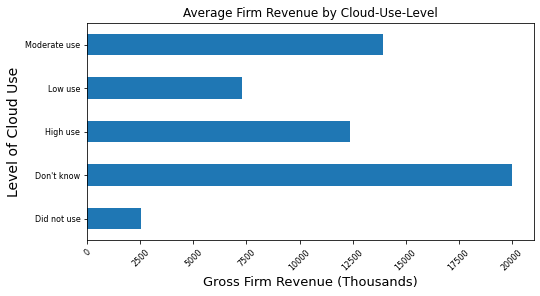

In [193]:
#below is the final plot
cloud_plot = Cloud_usepl.plot(title='Average Firm Revenue by Cloud-Use-Level',x='TECHUSE_LABEL', kind='barh',fontsize=8,figsize=(8,4))
cloud_plot.set_ylabel('Level of Cloud Use',size=14)
cloud_plot.set_xlabel('Gross Firm Revenue (Thousands)',size=13)
plt.xticks(rotation=45)

In [194]:
#how on earth could a merge happen? If i were to merge data on just all African Americans I could technically look at two different tthings but jeez how do?
#Family owned, African American
#african-American firms that are family owned

In [195]:
#I wished to investigate the number of employees working for family-owned firms by owner-race.

#I first normalized all categories that were not RACE_GROUP_LABEL
family_company_emps_byRace = df2[(df2['ETH_GROUP_LABEL'] == 'Total') & (df2['NAICS2017_LABEL'] == 'Total for all sectors') & (df2['SEX_LABEL'] == 'Total') & (df2['VET_GROUP_LABEL'] == 'Total') & (df2['YIBSZFI_LABEL'] == 'All firms') & (df2['EMPSZFI_LABEL'] == 'All firms')]

#I then limited the sub-dataset to the RACE_GROUP_LABEL as well as the number of employees and the category that determined if a company was family-owned (BUSCHAR)
family_company_emps_byRace = family_company_emps_byRace[['BUSCHAR','RACE_GROUP_LABEL','EMP','FIRMPDEMP']]

In [196]:
#I filtered BUSCHAR to the value for family-owned
family_company_emps_byRace = family_company_emps_byRace[df2.BUSCHAR == 'BM']

#I altered the data-type for EMP so it would be numeric.
family_company_emps_byRace['EMP']=family_company_emps_byRace['EMP'].astype(float)

#I altered the data-type for FIRMPDEMP so it would be numeric
family_company_emps_byRace['FIRMPDEMP']=family_company_emps_byRace['FIRMPDEMP'].astype(float)

#To prevent overlap, I filtered the race-group variable so there would be no response variables that were totals or aggregations
family_company_emps_byRace = family_company_emps_byRace[(df2['RACE_GROUP_LABEL'] == 'American Indian and Alaska Native') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'Asian') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'Black or African American') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'Native Hawaiian and Other Pacific Islander') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'White')]

#I next grouped the employee counts by owner-race-group and summed them
family_company_emps_byRace = family_company_emps_byRace.groupby('RACE_GROUP_LABEL')['EMP'].sum()

C:\Users\Daniel\AppData\Local\Temp/ipykernel_25268/4028918127.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  family_company_emps_byRace = family_company_emps_byRace[df2.BUSCHAR == 'BM']
C:\Users\Daniel\AppData\Local\Temp/ipykernel_25268/4028918127.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  family_company_emps_byRace = family_company_emps_byRace[(df2['RACE_GROUP_LABEL'] == 'American Indian and Alaska Native') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'Asian') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'Black or African American') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'Native Hawaiian and Other Pacific Islander') | (family_company_emps_byRace['RACE_GROUP_LABEL'] == 'White')]


In [197]:
#showcasing the group-by
family_company_emps_byRace

RACE_GROUP_LABEL
American Indian and Alaska Native               19689.0
Asian                                          537543.0
Black or African American                       96433.0
Native Hawaiian and Other Pacific Islander          0.0
White                                         7356690.0
Name: EMP, dtype: float64

In [198]:
#I then built a custom data-frame off of the group-by
d = {'RACE_GROUP_LABEL': ['Native American','Asian','Black','Pacific Islander','White'], 'Employees': [19689,537543,96433,0,7356690]}
family_company_emps_byRace = pd.DataFrame(data=d)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Native American'),
  Text(4, 0, 'Pacific Islander')])

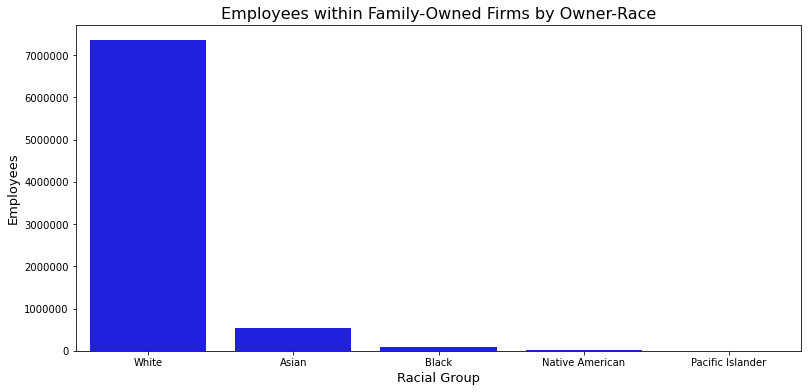

In [199]:
#below is the final plot
family_company_emps_byRace = family_company_emps_byRace.sort_values(by='Employees', ascending=False)
plt.figure(figsize = (13,6))
ax = sns.barplot(x=family_company_emps_byRace['RACE_GROUP_LABEL'],y=family_company_emps_byRace['Employees'],color='b', )
ax.set_xlabel('Racial Group',size=13)
ax.set_ylabel('Employees',size=13)
ax.set_title('Employees within Family-Owned Firms by Owner-Race',size=16)
plt.xticks(rotation=0)

In [200]:
#Finally, I wanted to investigate the ratio of the use of Specialized Software by Industry Type

#I began by setting all categorical columns that were not industry (NAICS2017_LABEL), and were not related to technology-use (TECHUSE_LABEL), as their total.
industry_software = df[(df['ETH_GROUP_LABEL'] == 'Total') & (df['IMPACTWF_P_LABEL'] == 'All firms') & (df['IMPACTWF_U_LABEL'] == 'All firms') & (df['MOTPRODTECH_LABEL'] == 'All firms') & (df['MOTUSETECH_LABEL'] == 'All firms') & (df['NSFSZFI_LABEL'] == 'All firms') & (df['RACE_GROUP_LABEL'] == 'Total') & (df['SEX_LABEL'] == 'Total') & (df['VET_GROUP_LABEL'] == 'Total')]

#I next filtered to the columns to industry, tech-use, and the count of firms.
industry_software = industry_software[['NAICS2017_LABEL','TECHUSE_LABEL','FIRMPDEMP']]

#I took the liberty of combining two categorical responses that seemed highley related. 'Specialized Software: Tested, but did not use in production or service' and 'Specialized Software: Low use'.
#I set all instances of the former as instances of the latter.
industry_software.loc[industry_software.TECHUSE_LABEL == 'Specialized Software: Tested, but did not use in production or service', 'TECHUSE_LABEL'] = 'Specialized Software: Low use'

#I then filtered to fields that examined the use of Specialized-Software only.
industry_software = industry_software[(industry_software['TECHUSE_LABEL'] == 'Specialized Software: Low use') | (industry_software['TECHUSE_LABEL'] == 'Specialized Software: Moderate use') | (industry_software['TECHUSE_LABEL'] == 'Specialized Software: High use')]

#Finally I removed both the totals and 'unclassified' fields from the sub-dataset.
industry_software = industry_software[(industry_software['NAICS2017_LABEL'] != 'Total for all sectors') & (industry_software['NAICS2017_LABEL'] != 'Industries not classified')]

In [201]:
#I grouped the number of firms by industry and took their summation
software_groups = industry_software.groupby(['NAICS2017_LABEL'])['FIRMPDEMP'].sum()

In [202]:
sum_list = []
industry_list = ['Agriculture, forestry, fishing and hunting', 'Utilities', 'Mining, quarrying, and oil and gas extraction', 'Construction', 'Wholesale trade', 'Manufacturing', 'Retail trade', 'Transportation and warehousing', 'Information', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional, scientific, and technical services', 'Management of companies and enterprises', 'Administrative and support and waste management and remediation services', 'Health care and social assistance', 'Educational services', 'Accommodation and food services', 'Arts, entertainment, and recreation']         
industry_list_edit = ['Agriculture','Utilities','Mining and Extraction','Construction','Wholesale Trade','Manufacturing','Retail Trade','Transportation and Warehousing','Information','Finance and Insurance','Real Estate','Technical Services','Management','Administrative','Heath Care','Educational Services','Food Services','Arts and Entertainment']

#x = industry_software[(industry_software['NAICS2017_LABEL'] == 'Agriculture, forestry, fishing and hunting')]
#y = x.agg({'FIRMPDEMP':['sum']})
#print(y)


#using a for loop, I populated an empty list with the sum of firms by industry.
for industry in range(0,len(industry_list)):
    x= industry_software[(industry_software['NAICS2017_LABEL'] == (industry_list[industry]))]
    z = 0
    for y in x['FIRMPDEMP']:
        z = z + y
    sum_list.append(z)
    
#I created separate dataframes for each level of Specialized-Software use
industry_software_low = industry_software[industry_software.TECHUSE_LABEL == 'Specialized Software: Low use']
industry_software_moderate = industry_software[industry_software.TECHUSE_LABEL == 'Specialized Software: Moderate use']
industry_software_high = industry_software[industry_software.TECHUSE_LABEL == 'Specialized Software: High use']

#I then used for loops to populate empty lists with the counts of firms belonging to the categories of 'Low use of Specialized Software', 'Moderate use of Specialized Software'
#and 'High use of Specialized Software'
low_list = []
for industry in range(0,len(industry_list)):
    x= industry_software_low[(industry_software_low['NAICS2017_LABEL'] == (industry_list[industry]))]
    z = 0
    for y in x['FIRMPDEMP']:
        z = z + y
    low_list.append(z)
    
moderate_list = []
for industry in range(0,len(industry_list)):
    x= industry_software_moderate[(industry_software_moderate['NAICS2017_LABEL'] == (industry_list[industry]))]
    z = 0
    for y in x['FIRMPDEMP']:
        z = z + y
    moderate_list.append(z)

high_list = []
for industry in range(0,len(industry_list)):
    x= industry_software_high[(industry_software_high['NAICS2017_LABEL'] == (industry_list[industry]))]
    z = 0
    for y in x['FIRMPDEMP']:
        z = z + y
    high_list.append(z)


In [203]:
#I then populated lists containing the ratios of each category
#I did this by using a for loop, and dividing each category list from the list of totals.

low_list

low_list_decframe = []
for item in range(0,len(low_list)):
    low_list_decframe.append(low_list[item]/sum_list[item])

In [204]:
moderate_list

moderate_list_decframe = []
for item in range(0,len(moderate_list)):
    moderate_list_decframe.append(moderate_list[item]/sum_list[item])

In [205]:
high_list

high_list_decframe = []
for item in range(0,len(high_list)):
    high_list_decframe.append(high_list[item]/sum_list[item])

In [206]:
#Finally, I created a dataframe with all of these lists.
#In order to create a more pleasing graphic, I limited my data to only the first seven industries.

data = {'Low Use':low_list_decframe[0:7],
        'Moderate Use':moderate_list_decframe[0:7],
        'High Use':high_list_decframe[0:7]}
index = industry_list_edit[0:7]

industryDF = pd.DataFrame(data=data, index=index)

Text(0.5, 0, 'Industry')

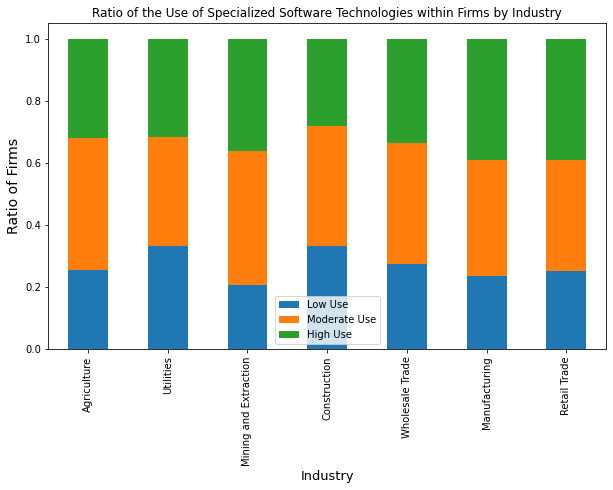

<Figure size 1296x504 with 0 Axes>

In [207]:
#The final stacked bar-chart is below.
#All bars add up to 1.

industry_plot = industryDF.plot(title='Ratio of the Use of Specialized Software Technologies within Firms by Industry', figsize=(10,6), kind='bar', stacked=True)
plt.figure(figsize = (18,7))
industry_plot.set_ylabel('Ratio of Firms',size=14)
industry_plot.set_xlabel('Industry',size=13)